In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/ncaa_dataset_outer_join.csv')
df.head()

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,6,10,38,40,44,45,46,47,48,49,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ConfAbbrev,Description,Season,DayNum,WTeamID,LTeamID,CRType,CityID,WScore,LScore,...,RegionX,RegionY,RegionZ,SecondaryTourney,FirstDayNum,LastDayNum,CoachName,TeamName,FirstD1Season,LastD1Season
0,a_sun,Atlantic Sun Conference,2001.0,121.0,1194.0,1144.0,Regular,4027.0,92.0,84.0,...,West,Midwest,Southeast,NIT,0.0,154.0,reggie_minton,Abilene Chr,2014.0,2019.0
1,a_ten,Atlantic 10 Conference,2001.0,121.0,1416.0,1240.0,Regular,4061.0,80.0,51.0,...,Midwest,Southeast,West,NIT,0.0,154.0,bob_huggins,Air Force,1985.0,2019.0
2,aac,American Athletic Conference,2001.0,122.0,1209.0,1194.0,Regular,4080.0,84.0,71.0,...,Southeast,Midwest,West,NIT,0.0,154.0,wimp_sanderson,Akron,1985.0,2019.0
3,acc,Atlantic Coast Conference,2001.0,122.0,1359.0,1239.0,Regular,4340.0,79.0,73.0,...,Midwest,Southeast,West,NIT,0.0,154.0,james_oliver,Alabama,1985.0,2019.0
4,aec,America East Conference,2001.0,122.0,1391.0,1273.0,Regular,4027.0,76.0,74.0,...,West,Midwest,Southeast,NIT,0.0,154.0,davey_whitney,Alabama A&M,2000.0,2019.0


In [38]:
df.shape

(87504, 56)

In [39]:
df.describe()

,Season,DayNum,WTeamID,LTeamID,CityID,WScore,LScore,NumOTPeriods,WFieldGoalsMade,WFieldGoalsAttempted,...,LBlocks,LPersonalFouls,GameRound,EarlyDayNum,LateDayNum,TeamID,FirstDayNum,LastDayNum,FirstD1Season,LastD1Season
count,5149.000000,5149.000000,5149.000000,5149.000000,54698.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,720.000000,720.000000,720.000000,2286.000000,11348.000000,11348.000000,366.000000,366.000000
mean,2010.300252,126.851816,1288.964459,1285.115751,4185.305148,75.154580,63.745229,0.069656,26.216603,55.143130,...,2.893130,19.096374,3.266667,143.955556,144.644444,1291.681977,0.666637,153.205146,1988.360656,2018.153005
std,5.464760,3.221430,104.919757,104.642126,108.955233,10.758749,10.353124,0.296292,4.792528,7.244834,...,2.018546,4.191599,1.867964,6.936086,6.533638,103.250141,7.288572,8.532947,7.462122,4.733857
min,2001.000000,119.000000,1101.000000,1102.000000,4001.000000,47.000000,29.000000,0.000000,13.000000,34.000000,...,0.000000,7.000000,0.000000,134.000000,135.000000,1101.000000,0.000000,20.000000,1985.000000,1985.000000
25%,2006.000000,124.000000,1201.000000,1196.000000,4087.000000,68.000000,57.000000,0.000000,23.000000,50.000000,...,1.000000,16.000000,2.000000,138.000000,139.000000,1209.000000,0.000000,154.000000,1985.000000,2019.000000
50%,2010.000000,128.000000,1288.000000,1282.000000,4188.000000,75.000000,63.000000,0.000000,26.000000,55.000000,...,3.000000,19.000000,3.000000,143.000000,144.000000,1287.000000,0.000000,154.000000,1985.000000,2019.000000
75%,2015.000000,129.000000,1381.000000,1377.000000,4274.000000,82.000000,71.000000,0.000000,29.000000,60.000000,...,4.000000,22.000000,5.000000,152.000000,152.000000,1387.000000,0.000000,154.000000,1985.000000,2019.000000
max,2019.000000,132.000000,1464.000000,1466.000000,4449.000000,121.000000,105.000000,2.000000,44.000000,84.000000,...,13.000000,33.000000,6.000000,154.000000,154.000000,1463.000000,135.000000,154.000000,2019.000000,2019.000000


In [7]:
teams_df = pd.read_csv('data/mens-machine-learning-competition-2019/Stage2DataFiles/Teams.csv')
teams_df.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019


In [9]:
teams_df.shape

(366, 4)

In [23]:
columns = ['TeamID',
           'AVGScore',
           'AVGFieldGoalsMade',
           'AVGFieldGoalsAttempted',
           'AVGThreePointersMade',
           'AVGThreePointersAttempted',
           'AVGFreeThrowsAttempted',
           'AVGOffensiveRebounds',
           'AVGDefensiveRebounds',
           'AVGAssists',
           'AVGTurnovers',
           'AVGSteals',
           'AVGBlocks',
           'AVGPersonalFouls',
           'WinRate'
          ]

teams_dict = {}

for column in columns:
    teams_dict[column] = [0] * teams_df.shape[0]

In [24]:
for i, team in enumerate(teams_df['TeamID']):
    if i % 100 == 0:
        print(i)
    teams_dict['TeamID'][i] = team
    for column in columns[1:-1]:
        col_count = 0
        col_total = 0
        for c in ['W', 'L']:
            c_col = column.replace('AVG', c)
            df_temp = df[c_col][df[c + 'TeamID'] == team]
            for item in df_temp:
                if not pd.isna(item):
                    col_count += 1
                    col_total += item
        if col_count == 0:
            avg = 0
        else:
            avg = col_total / col_count
        teams_dict[column][i] = avg
        

0
100
200
300


In [25]:
my_df = pd.DataFrame.from_dict(teams_dict)
my_df.head()

,TeamID,AVGScore,AVGFieldGoalsMade,AVGFieldGoalsAttempted,AVGThreePointersMade,AVGThreePointersAttempted,AVGFreeThrowsAttempted,AVGOffensiveRebounds,AVGDefensiveRebounds,AVGAssists,AVGTurnovers,AVGSteals,AVGBlocks,AVGPersonalFouls,WinRate
0,1101,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0
1,1102,63.250,22.25,50.750,5.25,16.25,18.75,9.750,17.000,9.75,16.750,7.750,3.75,17.50,0
2,1103,68.200,26.40,59.400,6.20,19.80,16.20,13.200,24.400,14.80,12.400,6.600,2.60,18.40,0
3,1104,75.375,26.50,58.125,7.75,19.00,20.50,10.875,24.125,15.50,12.125,5.625,4.25,17.75,0
4,1105,69.200,25.60,57.600,5.80,19.60,18.60,10.400,22.600,15.40,11.000,7.600,2.20,17.20,0


In [28]:
for i, team in enumerate(teams_dict['TeamID']):
    wins = df[df['WTeamID'] == team].shape[0]
    losses = df[df['LTeamID'] == team].shape[0]
    if wins + losses == 0:
        rate = 0
    else:
        rate = wins / (wins + losses)
    teams_dict['WinRate'][i] = rate

In [29]:
my_df = pd.DataFrame.from_dict(teams_dict)
my_df.head()

,TeamID,AVGScore,AVGFieldGoalsMade,AVGFieldGoalsAttempted,AVGThreePointersMade,AVGThreePointersAttempted,AVGFreeThrowsAttempted,AVGOffensiveRebounds,AVGDefensiveRebounds,AVGAssists,AVGTurnovers,AVGSteals,AVGBlocks,AVGPersonalFouls,WinRate
0,1101,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,1.000000
1,1102,63.250,22.25,50.750,5.25,16.25,18.75,9.750,17.000,9.75,16.750,7.750,3.75,17.50,0.208333
2,1103,68.200,26.40,59.400,6.20,19.80,16.20,13.200,24.400,14.80,12.400,6.600,2.60,18.40,0.652174
3,1104,75.375,26.50,58.125,7.75,19.00,20.50,10.875,24.125,15.50,12.125,5.625,4.25,17.75,0.472222
4,1105,69.200,25.60,57.600,5.80,19.60,18.60,10.400,22.600,15.40,11.000,7.600,2.20,17.20,0.428571


In [30]:
my_df.shape

(366, 15)

In [31]:
df[df['WTeamID'] == 1101]

,ConfAbbrev,Description,Season,DayNum,WTeamID,LTeamID,CRType,CityID,WScore,LScore,...,RegionX,RegionY,RegionZ,SecondaryTourney,FirstDayNum,LastDayNum,CoachName,TeamName,FirstD1Season,LastD1Season
5111,NaN,NaN,2019.0,130.0,1101.0,1368.0,Regular,4253.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,154.0,ricky_stokes,NaN,NaN,NaN
5113,NaN,NaN,2019.0,131.0,1101.0,1309.0,Regular,4156.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,154.0,steve_shurina,NaN,NaN,NaN


In [32]:
df[df['LTeamID'] == 1101]

,ConfAbbrev,Description,Season,DayNum,WTeamID,LTeamID,CRType,CityID,WScore,LScore,...,RegionX,RegionY,RegionZ,SecondaryTourney,FirstDayNum,LastDayNum,CoachName,TeamName,FirstD1Season,LastD1Season


In [40]:
my_df = my_df[my_df['AVGScore'] > 0]

In [41]:
my_df.shape

(312, 15)

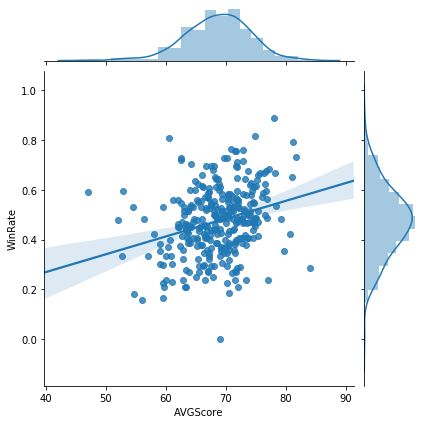

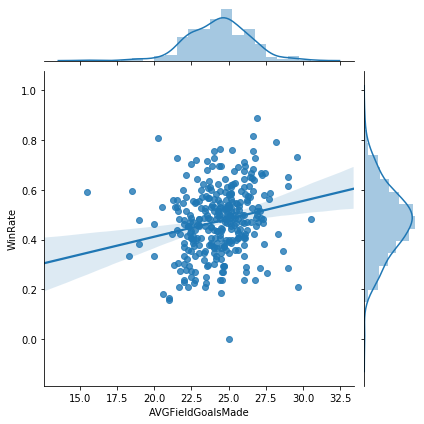

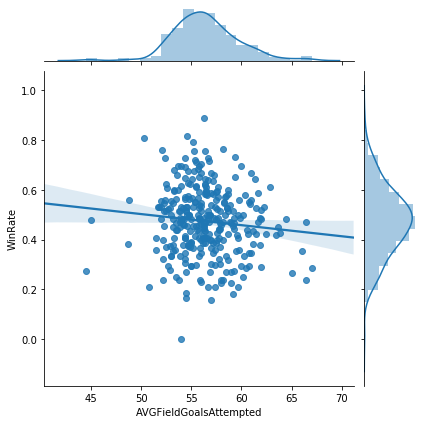

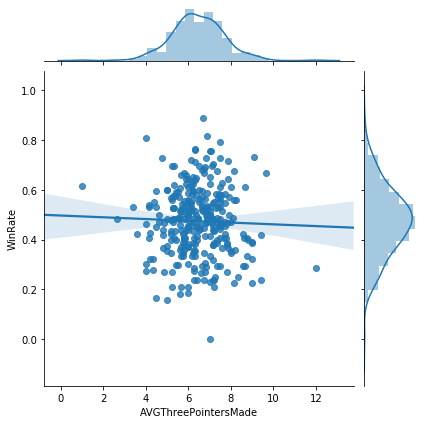

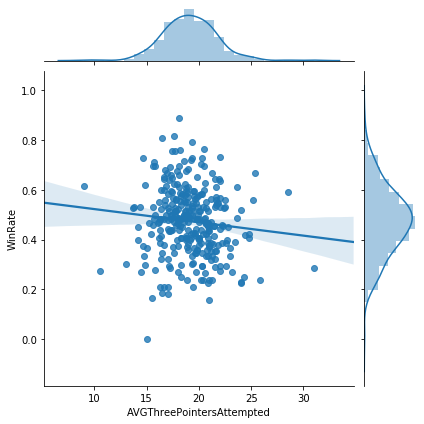

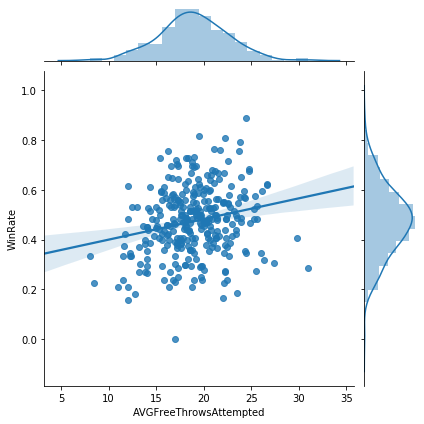

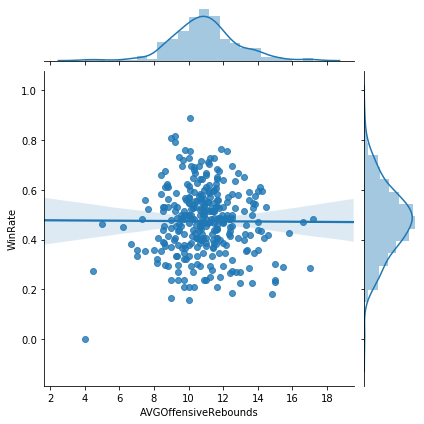

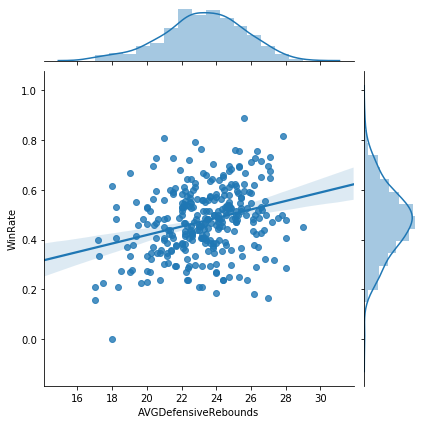

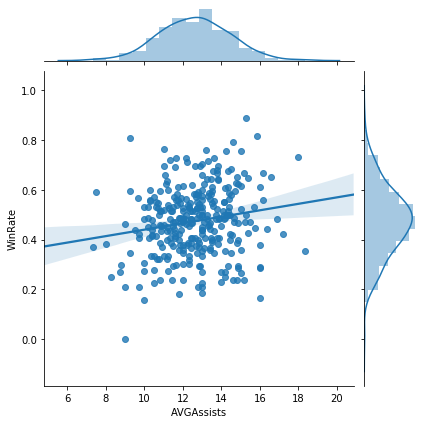

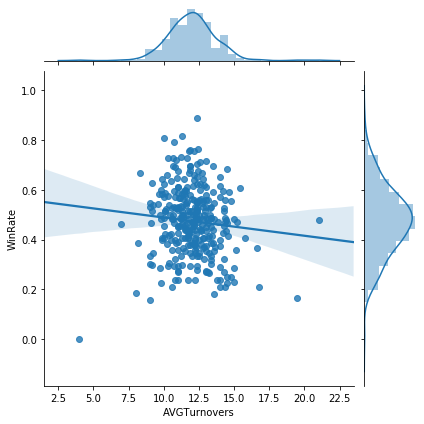

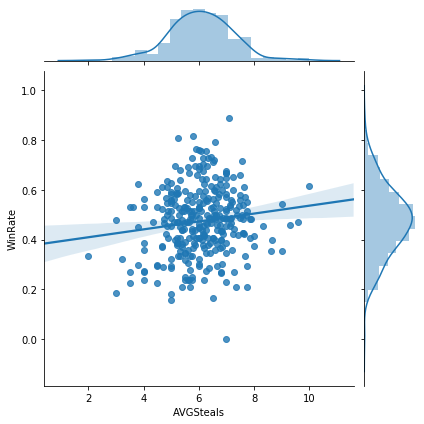

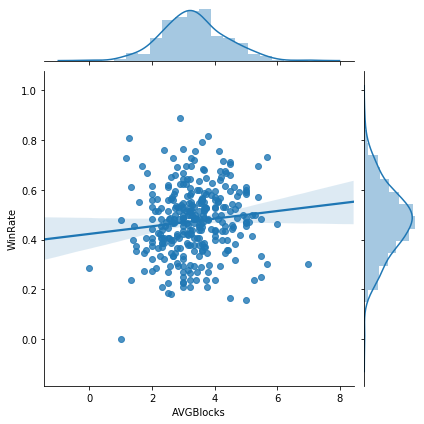

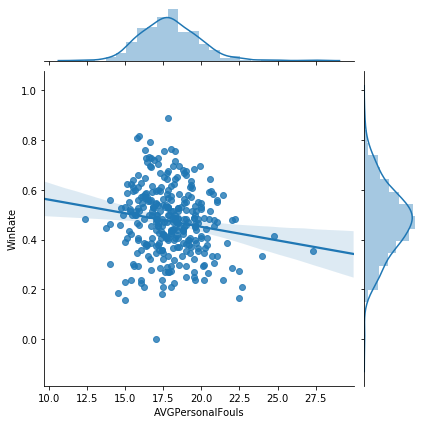

In [42]:
import seaborn as sns
%matplotlib inline

for column in columns[1:-1]:
    sns.jointplot(column, "WinRate", data=my_df, kind="reg")

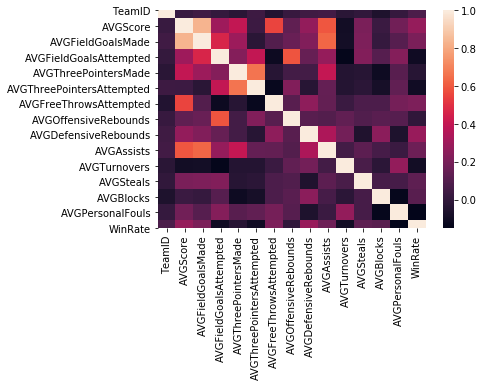

In [45]:
import matplotlib.pyplot as plt

sns.heatmap(my_df.corr())
plt.show()

In [49]:
seasons = df['Season'].dropna().unique()
seasons

array([2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019.])

In [50]:
seasons_dict = {}

for column in columns + ['Season']:
    seasons_dict[column] = [0] * teams_df.shape[0] * seasons.shape[0]

In [51]:
teams = teams_df['TeamID'].dropna().unique()
teams

array([1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
       1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
       1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166,
       1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177,
       1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188,
       1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199,
       1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210,
       1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221,
       1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232,
       1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243,
       1244, 1245, 1246, 1247, 1248, 1249, 1250, 12

In [53]:
i = 0
length = teams.shape[0] * seasons.shape[0]
for team in teams:
    for season in seasons:
        if i % 1000 == 0:
            print(f'{i}/{length}')
        
        seasons_dict['TeamID'][i] = team
        seasons_dict['Season'][i] = season
        
        for column in columns[1:-1]:
            col_count = 0
            col_total = 0
            for c in ['W', 'L']:
                c_col = column.replace('AVG', c)
                series = df[c_col][df[c + 'TeamID'] == team].dropna()
                for item in series:
                    col_count += 1
                    col_total += item
            if col_count == 0:
                avg = 0
            else:
                avg = col_total / col_count
            seasons_dict[column][i] = avg
        i += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900


In [54]:
seasons_df = pd.DataFrame.from_dict(seasons_dict)
seasons_df.head()

,TeamID,AVGScore,AVGFieldGoalsMade,AVGFieldGoalsAttempted,AVGThreePointersMade,AVGThreePointersAttempted,AVGFreeThrowsAttempted,AVGOffensiveRebounds,AVGDefensiveRebounds,AVGAssists,AVGTurnovers,AVGSteals,AVGBlocks,AVGPersonalFouls,WinRate,Season
0,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2001.0
1,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2002.0
2,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2003.0
3,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2004.0
4,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2005.0


In [57]:
i = 0
for team in teams:
    for season in seasons:
        wins = df[(df['WTeamID'] == team) & (df['Season'] == season)].shape[0]
        losses = df[(df['LTeamID'] == team) & (df['Season'] == season)].shape[0]
    if wins + losses == 0:
        rate = 0
    else:
        rate = wins / (wins + losses)
    seasons_dict['WinRate'][i] = rate
    i += 1

In [58]:
seasons_df = pd.DataFrame.from_dict(seasons_dict)
seasons_df.head()

,TeamID,AVGScore,AVGFieldGoalsMade,AVGFieldGoalsAttempted,AVGThreePointersMade,AVGThreePointersAttempted,AVGFreeThrowsAttempted,AVGOffensiveRebounds,AVGDefensiveRebounds,AVGAssists,AVGTurnovers,AVGSteals,AVGBlocks,AVGPersonalFouls,WinRate,Season
0,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2001.0
1,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2002.0
2,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2003.0
3,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2004.0
4,1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0


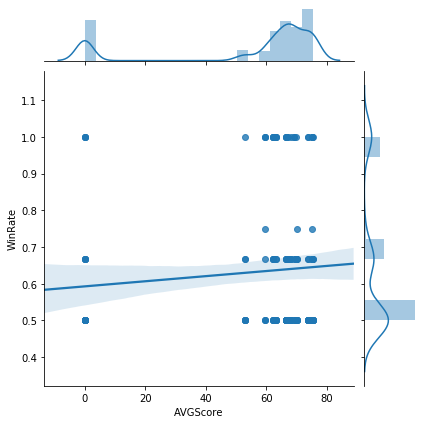

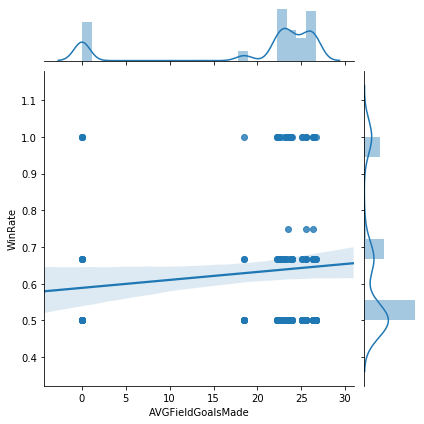

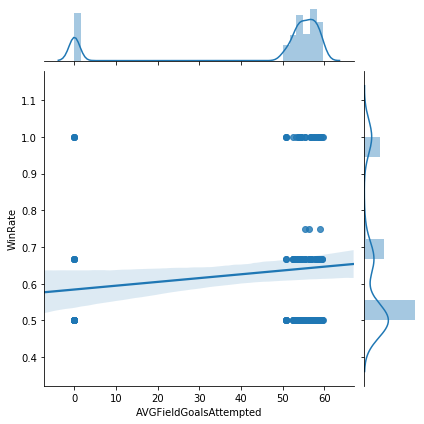

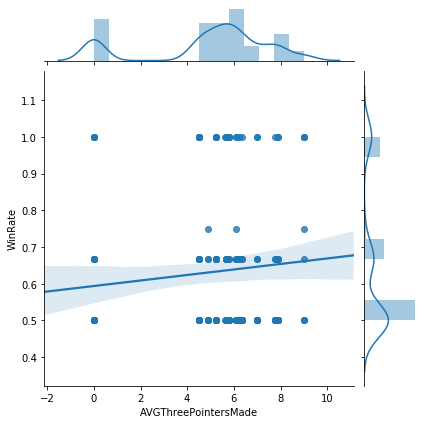

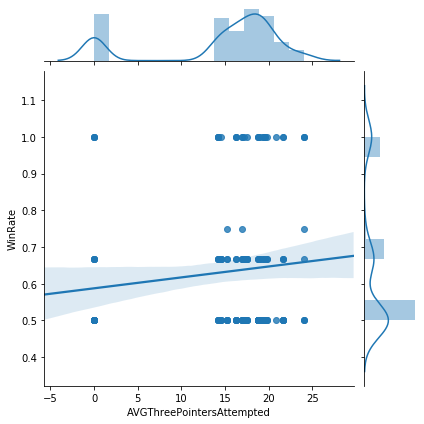

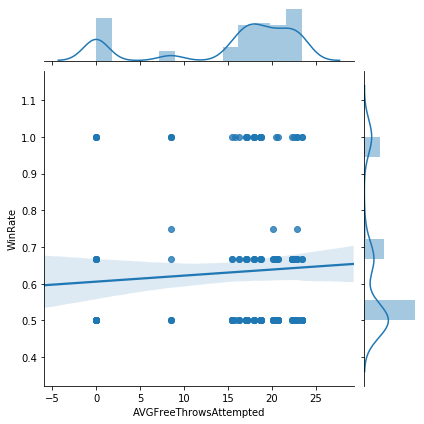

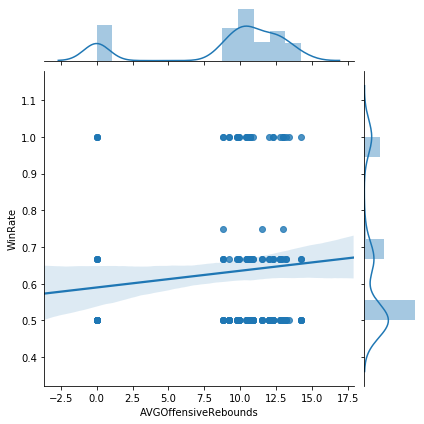

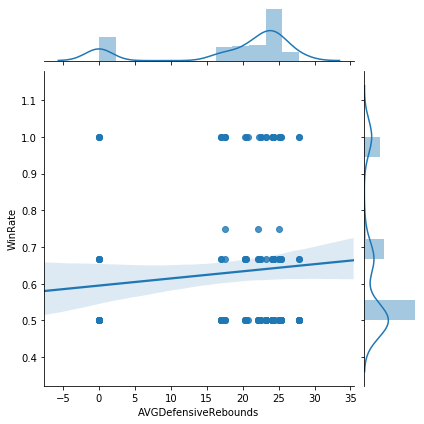

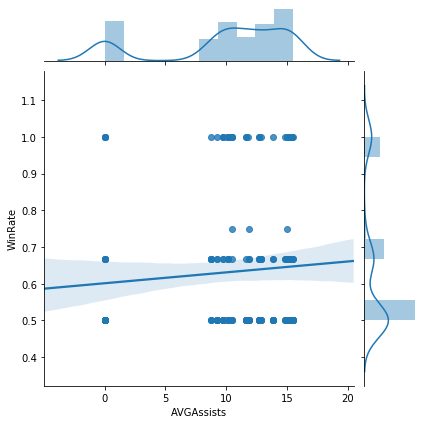

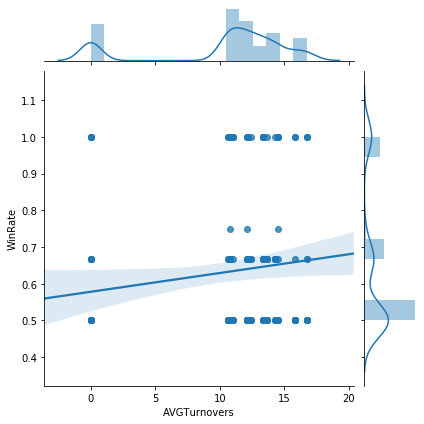

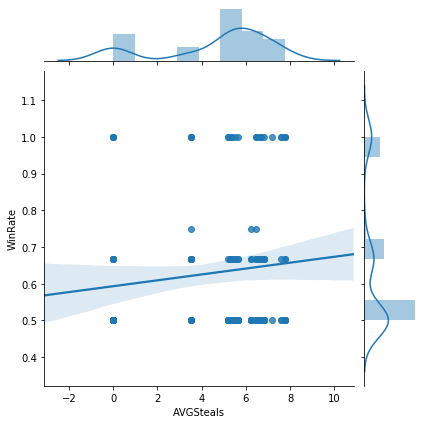

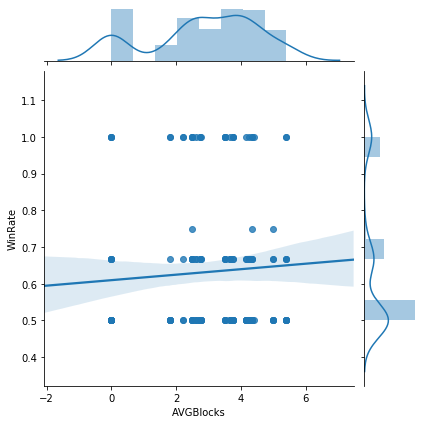

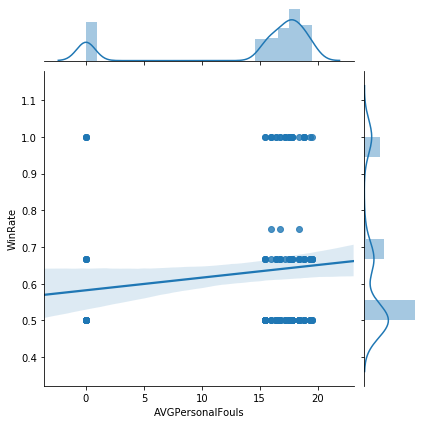

In [61]:
for column in columns[1:-1]:
    sns.jointplot(column, "WinRate", data=seasons_df[seasons_df['WinRate'] > 0], kind="reg")